In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mrsa_2013 = pd.read_csv('mrsa data/mrsa-in-hospitals-2013.csv')
mrsa_2014 = pd.read_csv('mrsa data/mrsa-in-hospitals-2014.csv')
mrsa_2015 = pd.read_csv('mrsa data/mrsa-in-hospitals-2015.csv')

In [4]:
mrsa_2013.columns

Index(['Year ', 'State', 'HAI', 'Facility_Name1', 'Facility_Name2',
       'Facility_Name3', 'FACID1', 'FACID2', 'FACID3', 'County',
       'Infection_Count', 'Patient_Days', 'SIR ', 'SIR_95%_CI_Lower_Limit',
       'SIR_95%_CI_Upper_Limit', 'Comparison', 'Notes'],
      dtype='object')

/srv/app/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/app/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([214.,  72.,  37.,  15.,   7.,   2.,   1.,   1.,   3.,   2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

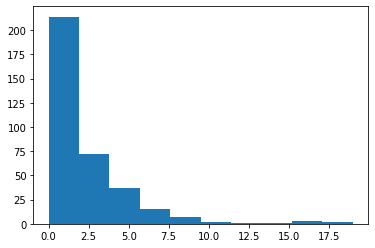

In [5]:
### Histogram of Infection Counts ###

plt.hist(mrsa_2013['Infection_Count'])

(array([297.,  41.,   8.,   6.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

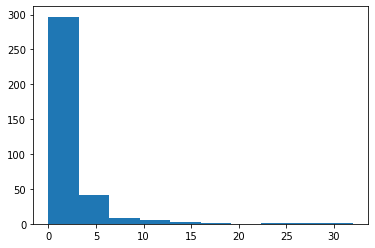

In [6]:
plt.hist(mrsa_2014['Cases'])

(array([258.,  52.,  34.,   6.,   5.,   0.,   3.,   1.,   0.,   3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

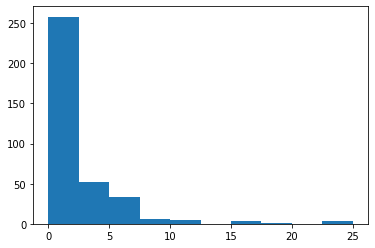

In [7]:
plt.hist(mrsa_2015['Hospital_Onset_Cases'])

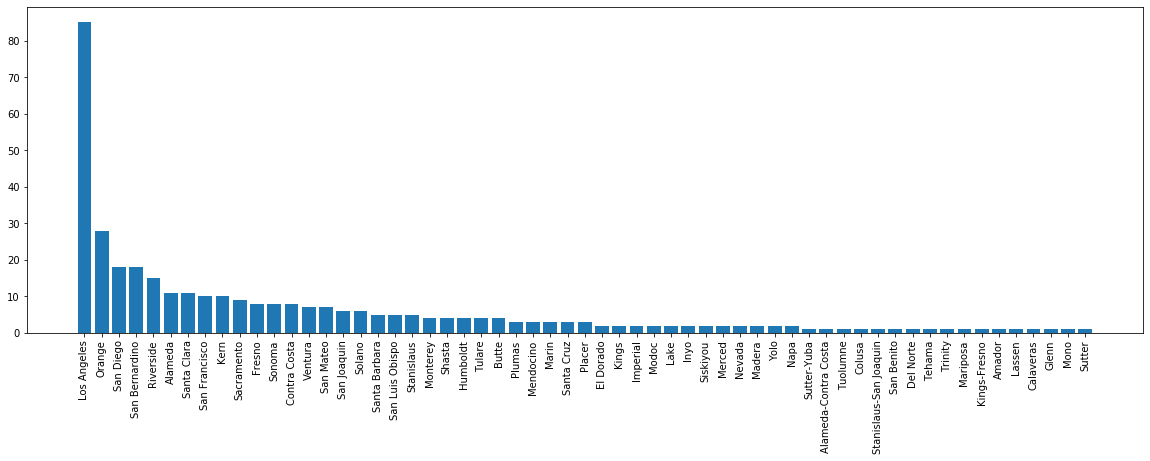

In [24]:
### Bar plots of County Count ### 

plt.figure(figsize=(20,6))

plt.bar(mrsa_2013['County'].value_counts().index, mrsa_2013['County'].value_counts());

plt.xticks(rotation=90);

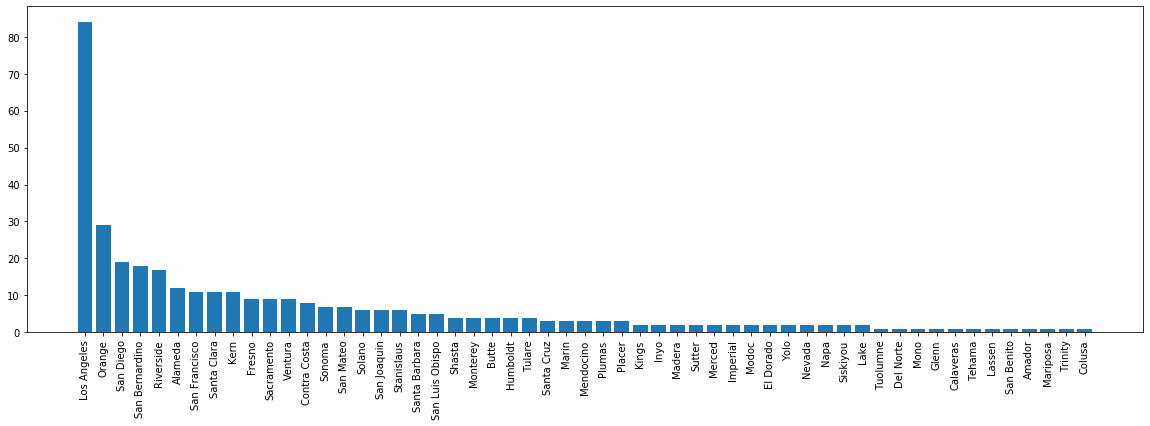

In [27]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2014['County'].value_counts().index, mrsa_2014['County'].value_counts());

plt.xticks(rotation=90);

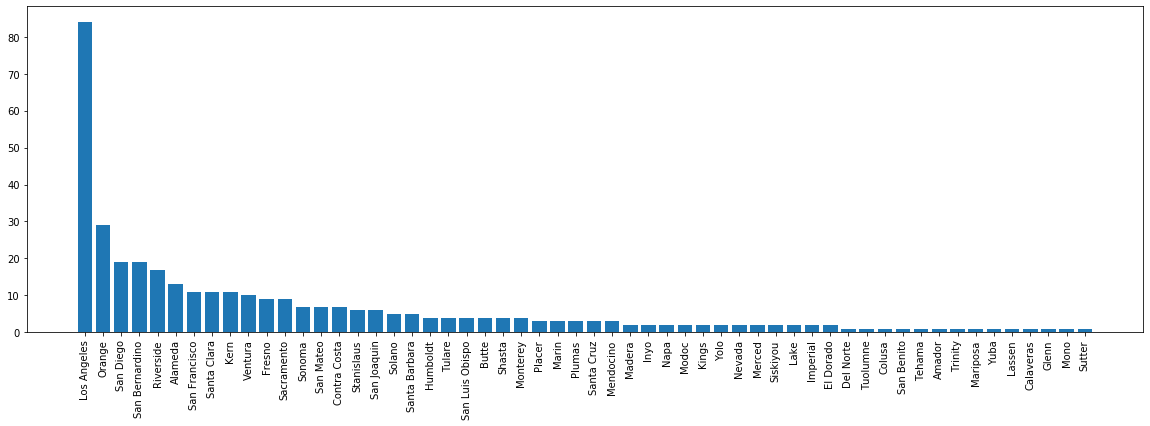

In [28]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2015['County'].value_counts().index, mrsa_2015['County'].value_counts());

plt.xticks(rotation=90);

In [ ]:
# below we tried to plot infection rates in LA county as reported by each unique hospital per data set. 
# However, it seems that not all of the same hospitals were used to record infection count over each year 

# Confusion: What is a useful plot to graph for infection rate by year by county (Sec 5c)
# 

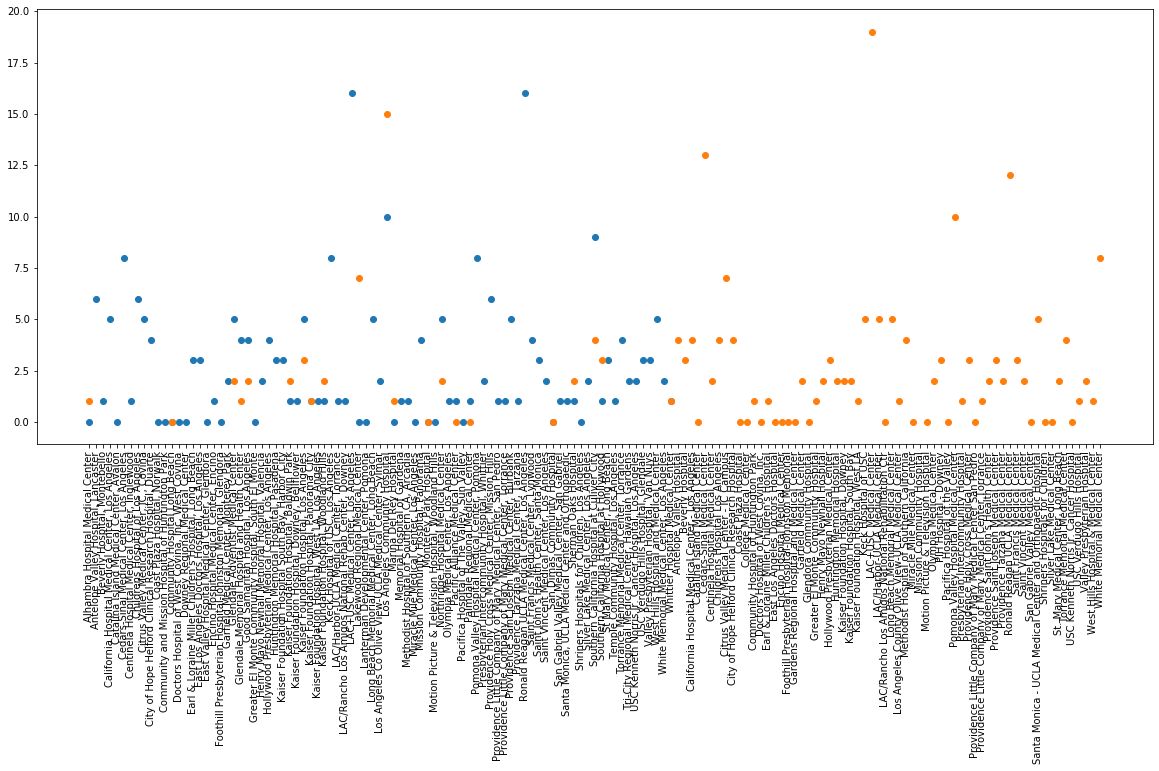

In [56]:
## Infection Rate by County by Year
plt.figure(figsize=(20,8))

hospitals = la_2013['Facility_Name1']
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']


plt.scatter(hospitals, la_2013['Infection_Count'])
plt.scatter(hospitals, la_2014['Cases'])

plt.xticks(rotation=90);

In [38]:
la_2013.columns

Index(['Year ', 'State', 'HAI', 'Facility_Name1', 'Facility_Name2',
       'Facility_Name3', 'FACID1', 'FACID2', 'FACID3', 'County',
       'Infection_Count', 'Patient_Days', 'SIR ', 'SIR_95%_CI_Lower_Limit',
       'SIR_95%_CI_Upper_Limit', 'Comparison', 'Notes'],
      dtype='object')

In [62]:
len(la_2014['Facility_Name1'].unique()) == len(la_2013['Facility_Name1'].unique())

False

In [64]:
a = ['a','b','c']
b = ['b','c','d']

ab = [set(a) & set(b)]
ab

[{'b', 'c'}]

In [76]:
len(la_2013['Facility_Name1']), len(la_2014['Facility_Name1']), len(la_2015['Facility_Name1']) # not the same hospitals

(85, 84, 84)

In [75]:
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

[set(la_2014['Facility_Name1']) & set(la_2015['Facility_Name1'])]

[{'Alhambra Hospital Medical Center',
  'Antelope Valley Hospital',
  'Beverly Hospital',
  'California Hospital Medical Center - Los Angeles',
  'Catalina Island Medical Center',
  'Cedars-Sinai Medical Center',
  'Centinela Hospital Medical Center',
  'Citrus Valley Medical Center - IC Campus',
  'City of Hope Helford Clinical Research Hospital',
  'Coast Plaza Hospital',
  'College Medical Center',
  'Community Hospital Long Beach',
  'Community Hospital of Huntington Park',
  "Earl & Loraine Miller Children's Hospital",
  'East Los Angeles Doctors Hospital',
  'Encino Hospital Medical Center',
  'Foothill Presbyterian Hospital-Johnston Memorial',
  'Gardens Regional Hospital and Medical Center',
  'Garfield Medical Center',
  'Glendale Adventist Medical Center',
  'Glendale Memorial Hospital and Health Center',
  'Glendora Community Hospital',
  'Good Samaritan Hospital, Los Angeles',
  'Greater El Monte Community Hospital',
  'Henry Mayo Newhall Hospital',
  'Hollywood Presbyteria

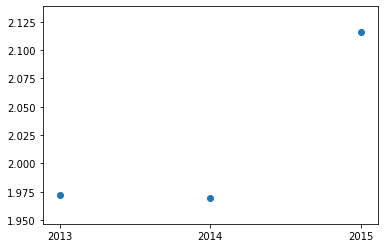

In [82]:
# infection rates by year
avg_inf_year = [np.mean(mrsa_2013['Infection_Count']),
                np.mean(mrsa_2014['Cases']),
                np.mean(mrsa_2015['Hospital_Onset_Cases'])]

plt.scatter(['2013','2014','2015'],avg_inf_year) #one possible version of 5B 

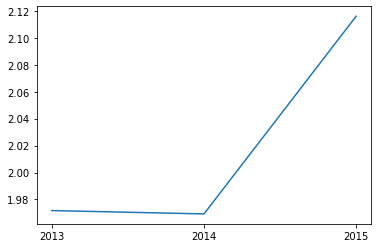

In [84]:
plt.plot(['2013','2014','2015'],avg_inf_year) #another version of 5B 

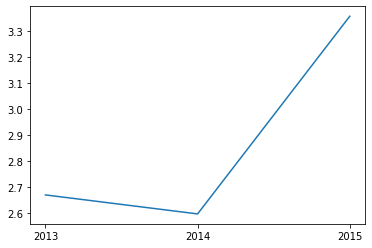

In [88]:
# trying again by county - plot average infection rate per year for each county

la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']


avg_inf_year_la = [np.mean(la_2013['Infection_Count']),
                np.mean(la_2014['Cases']),
                np.mean(la_2015['Hospital_Onset_Cases'])]

plt.plot(['2013','2014','2015'],avg_inf_year_la)

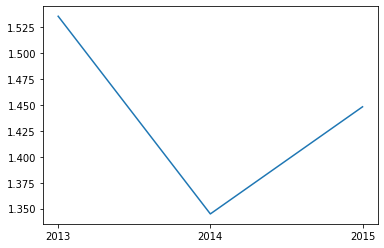

In [87]:
# trying again by county - plot average infection rate per year for each county

orange_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Orange']
orange_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Orange']
orange_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Orange']


avg_inf_year_orange = [np.mean(orange_2013['Infection_Count']),
                np.mean(orange_2014['Cases']),
                np.mean(orange_2015['Hospital_Onset_Cases'])]

plt.plot(['2013','2014','2015'],avg_inf_year_orange)

In [ ]:
# population versus infection

## Note: tried to upload census data set to datahub, but it did not work...file too big??